In [5]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Step 1: Define the Problem

**Key Questions:**
- What factors influence customer satisfaction in airlines?
- Can we predict customer satisfaction based on these factors?

**Model Objective:**
- The model will predict whether a customer is satisfied or not based on various features in the dataset.

**Usefulness to an Airline Company:**
- Identify areas for improvement to enhance customer satisfaction.
- Develop targeted strategies to improve service quality.
- Personalize customer experiences by predicting satisfaction levels.


# Step 2: Gather Data

**Task:**
- Load and inspect the dataset to understand the structure and types of features available.



In [7]:
df = pd.read_csv('Airline_customer_satisfaction.csv')

In [9]:
df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [10]:
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [12]:
df.shape

(129880, 22)

In [19]:
df['satisfaction'].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

# Step 3: Explore the Data

**Questions to Explore:**
- What are the distributions of key features (e.g., age, flight distance, service ratings)?
- Are there any missing values or anomalies in the data?
- What are the relationships between features and customer satisfaction?

In [21]:
# checking for missing values 
missing_values = df.isnull().sum

# displaying basic statistical summeries of numerical features 
summary_stats = df.describe()

missing_values , summary_stats

(<bound method DataFrame.sum of         satisfaction  Customer Type    Age  Type of Travel  Class  \
 0              False          False  False           False  False   
 1              False          False  False           False  False   
 2              False          False  False           False  False   
 3              False          False  False           False  False   
 4              False          False  False           False  False   
 ...              ...            ...    ...             ...    ...   
 129875         False          False  False           False  False   
 129876         False          False  False           False  False   
 129877         False          False  False           False  False   
 129878         False          False  False           False  False   
 129879         False          False  False           False  False   
 
         Flight Distance  Seat comfort  Departure/Arrival time convenient  \
 0                 False         False            

In [22]:
cleaned_df = df.copy()

In [25]:
cleaned_df.dropna()

cleaned_df.shape

(129880, 22)

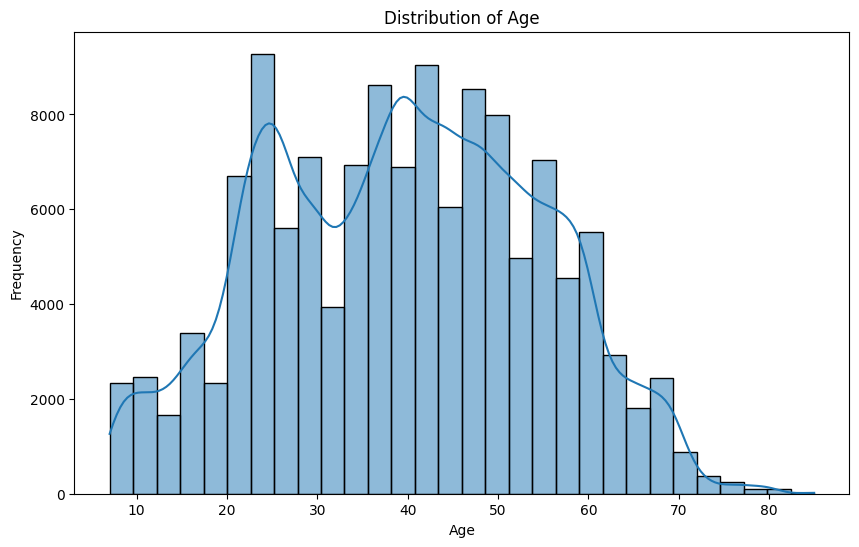

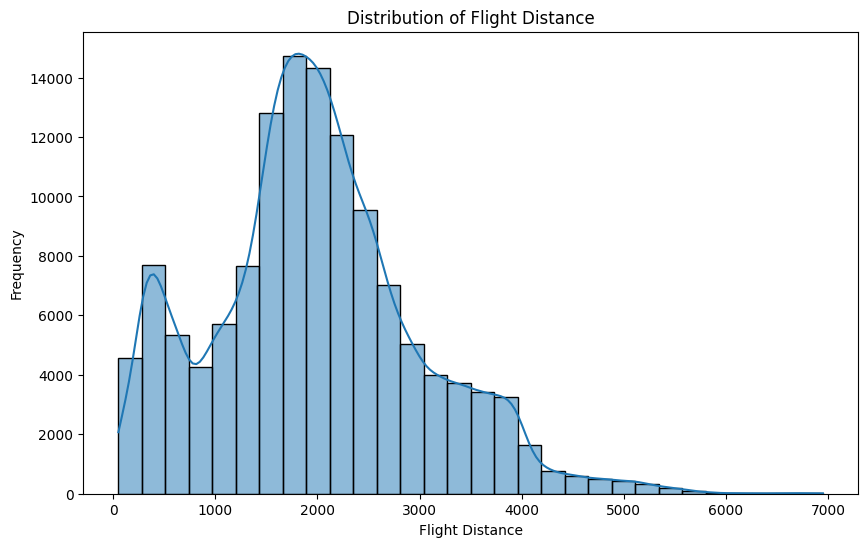

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distributions
def plot_distribution(cleaned_df, feature, bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(cleaned_df[feature], bins=bins, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot distributions for 'Age' and 'Flight Distance'
plot_distribution(cleaned_df, 'Age')
plot_distribution(cleaned_df, 'Flight Distance')


## Distribution Analysis of Age and Flight Distance

The distributions of **Age** and **Flight Distance** have been plotted:

- **Age:** The distribution is fairly uniform with a slight peak around the 30-40 age range.
- **Flight Distance:** The distribution shows that most flights are shorter distances with a long tail towards higher distances.

Next, let's visualize the distributions of some service ratings and explore their relationships with customer satisfaction.


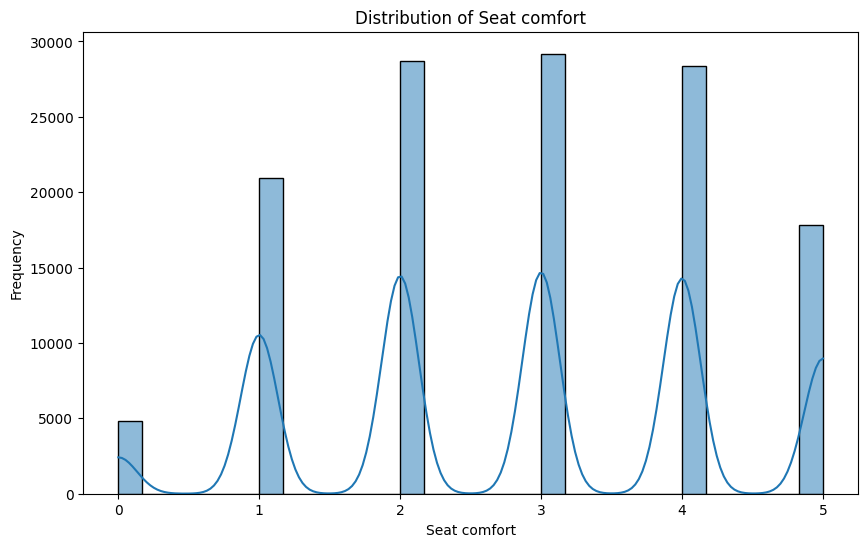

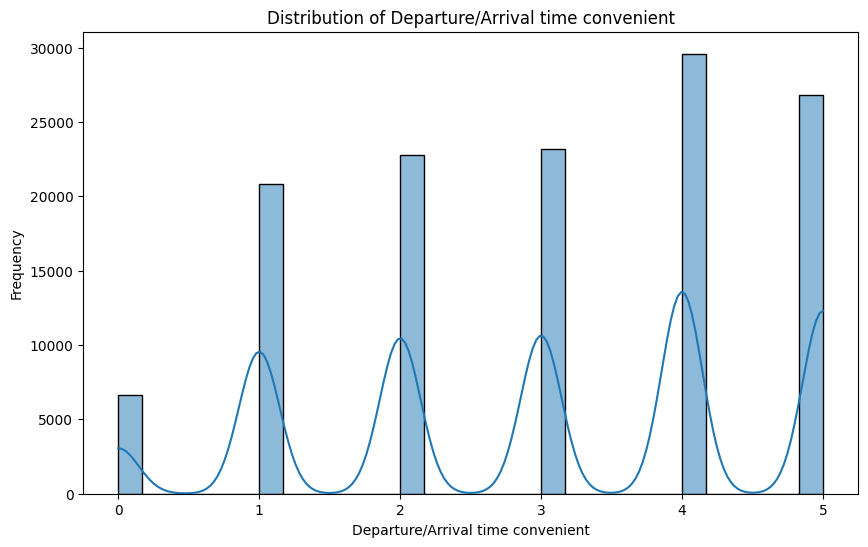

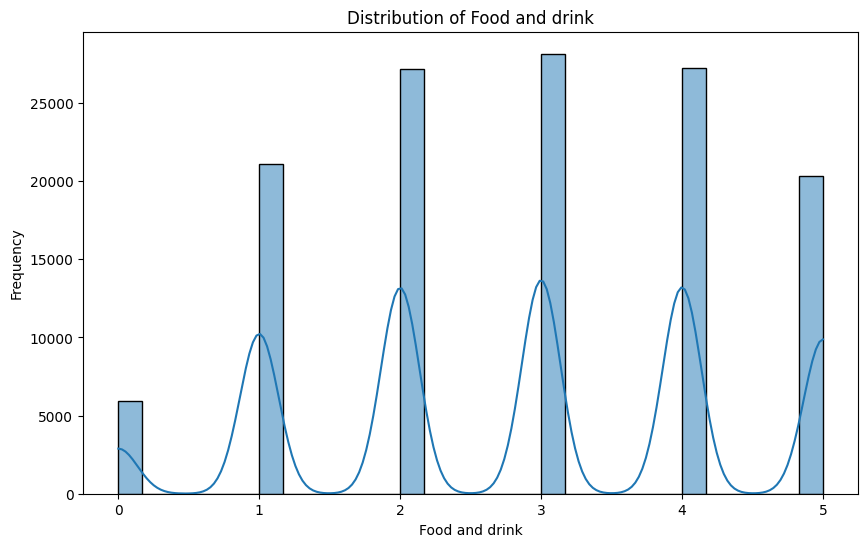

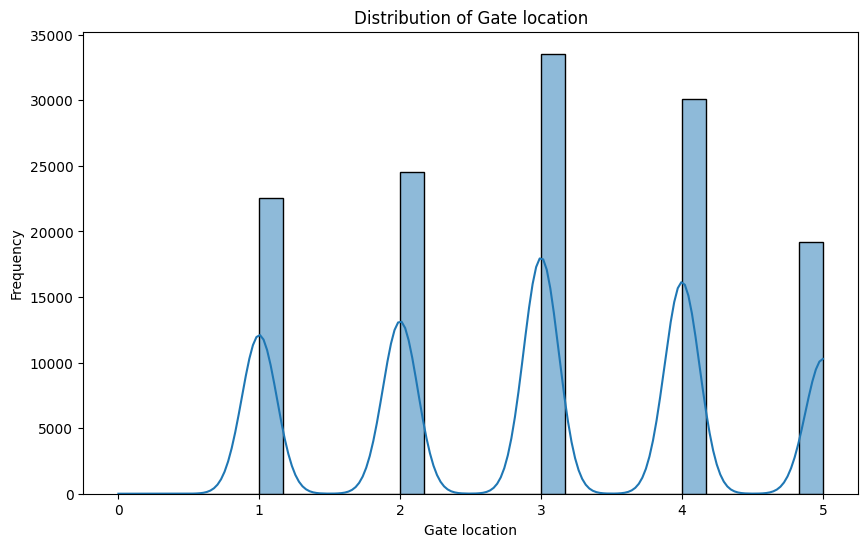

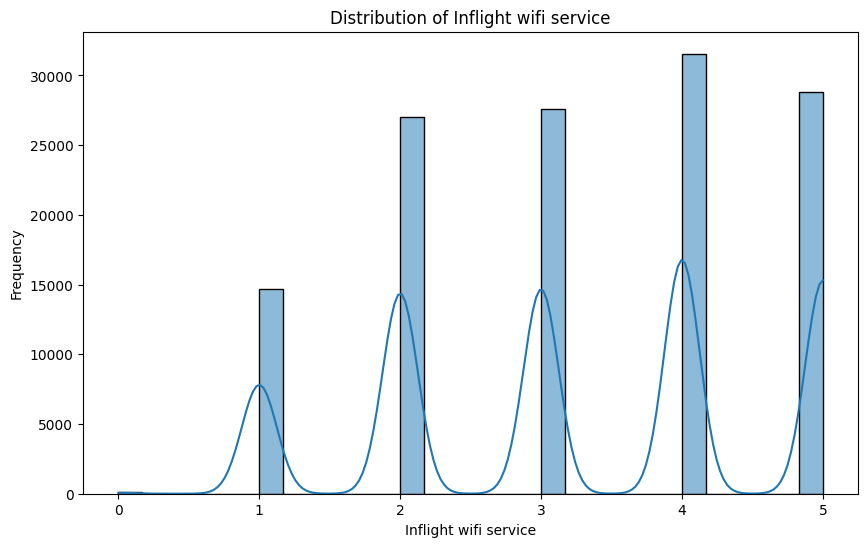

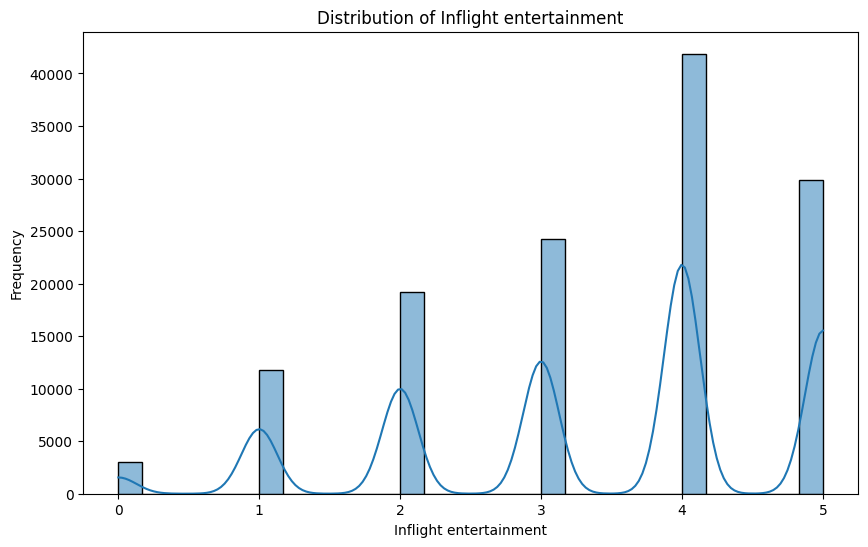

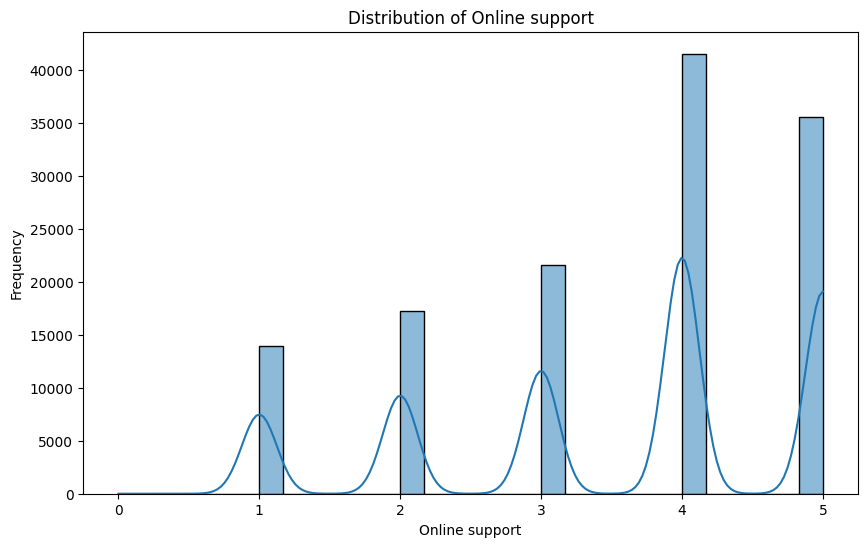

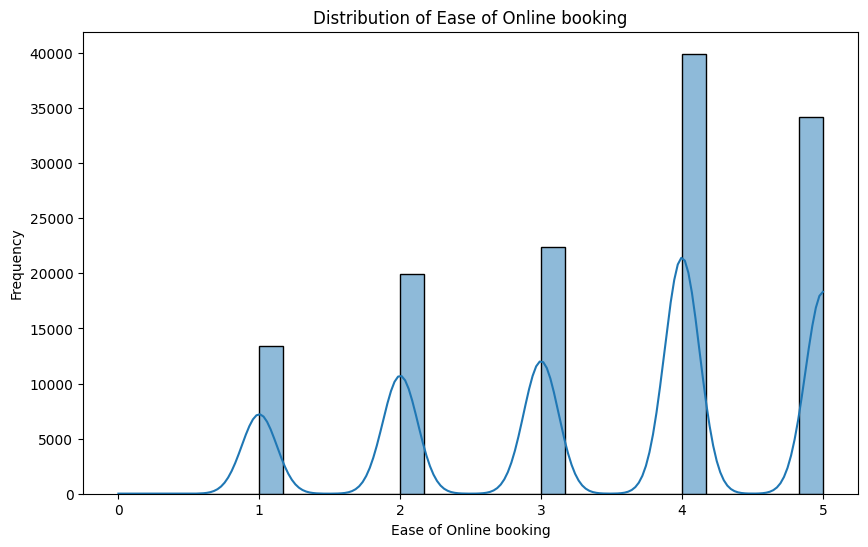

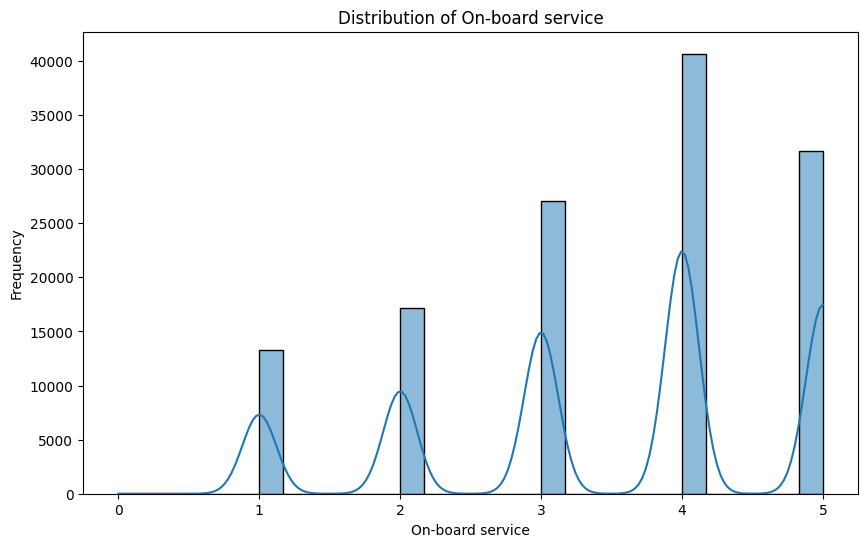

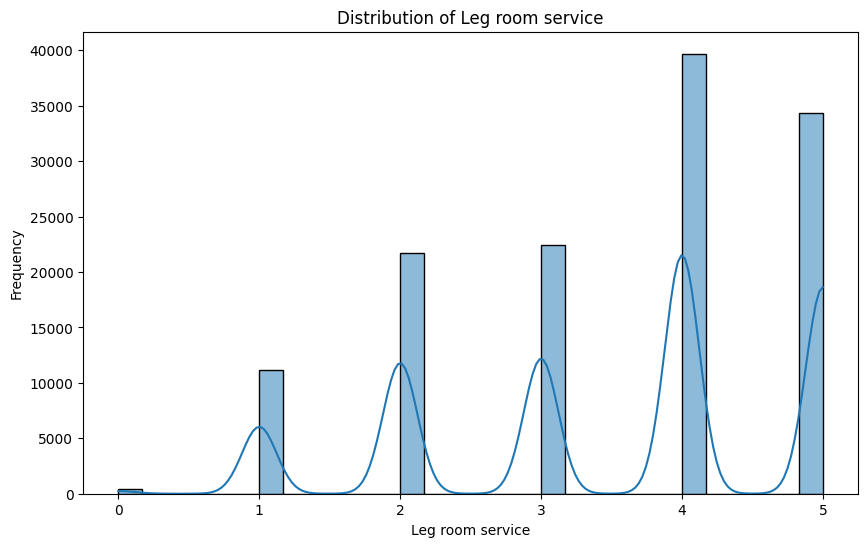

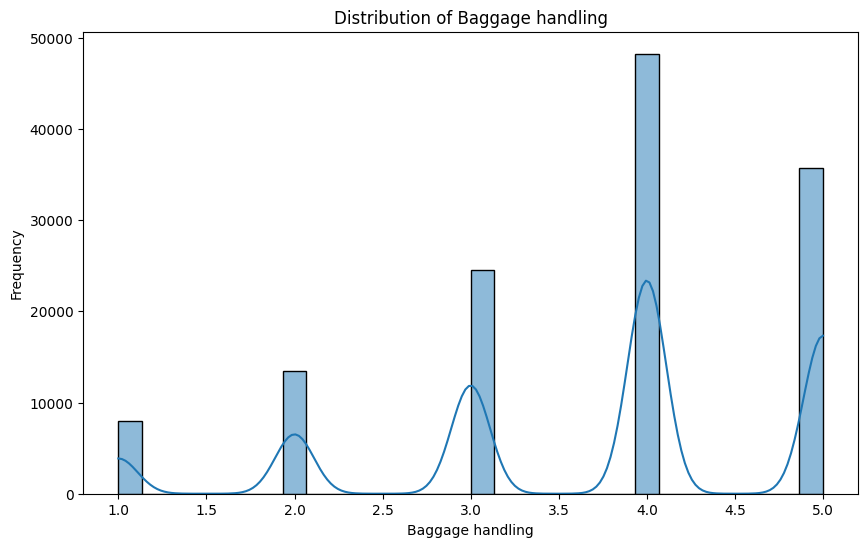

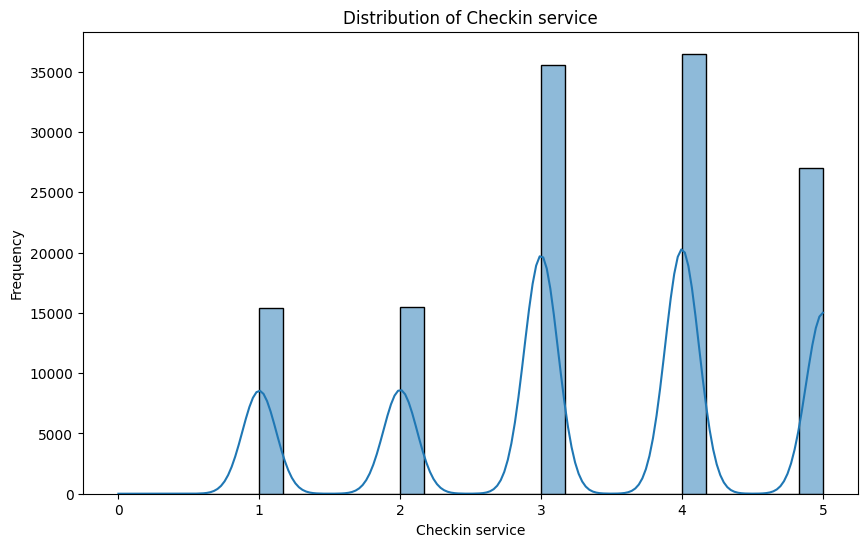

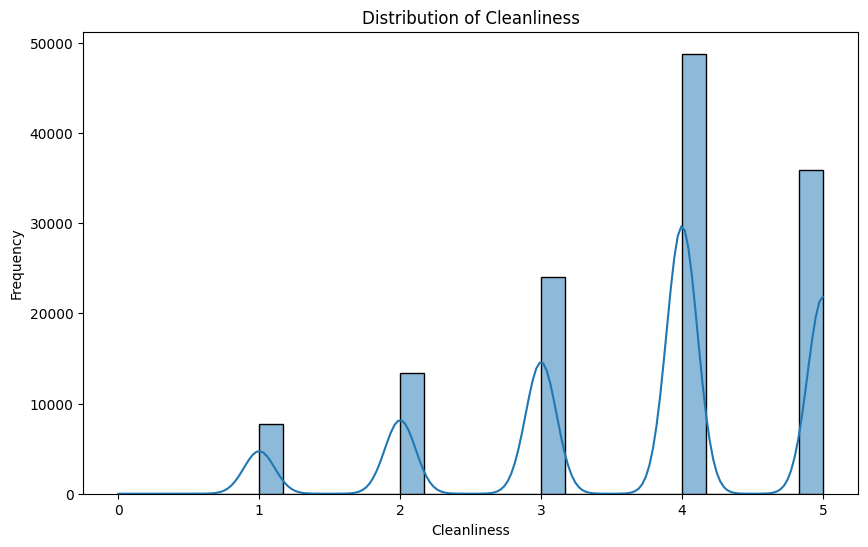

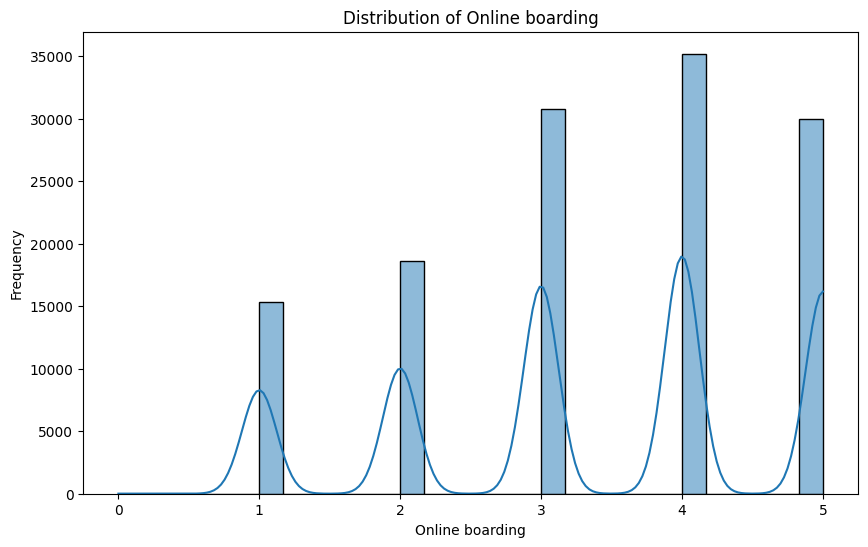

In [31]:
# List of service ratings to plot
service_ratings = [
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 
    'Gate location', 'Inflight wifi service', 'Inflight entertainment',
    'Online support', 'Ease of Online booking', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Cleanliness', 'Online boarding'
]

# Plot distributions for service ratings
for rating in service_ratings:
    plot_distribution(cleaned_df, rating)


## Distribution Analysis of Service Ratings

The distributions of the service ratings reveal various patterns:

- **Most ratings appear to have a concentration around mid to high values.**
- **Some ratings, such as Inflight wifi service, tend to be lower on average.**

Next, let's explore the relationships between these features and customer satisfaction.

## Exploring Relationships with Customer Satisfaction

We'll use box plots to visualize how different features vary with customer satisfaction.


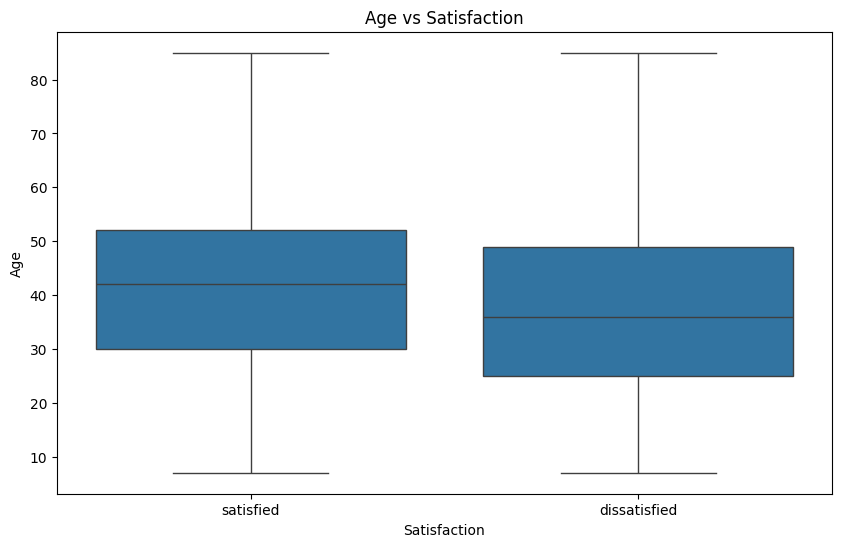

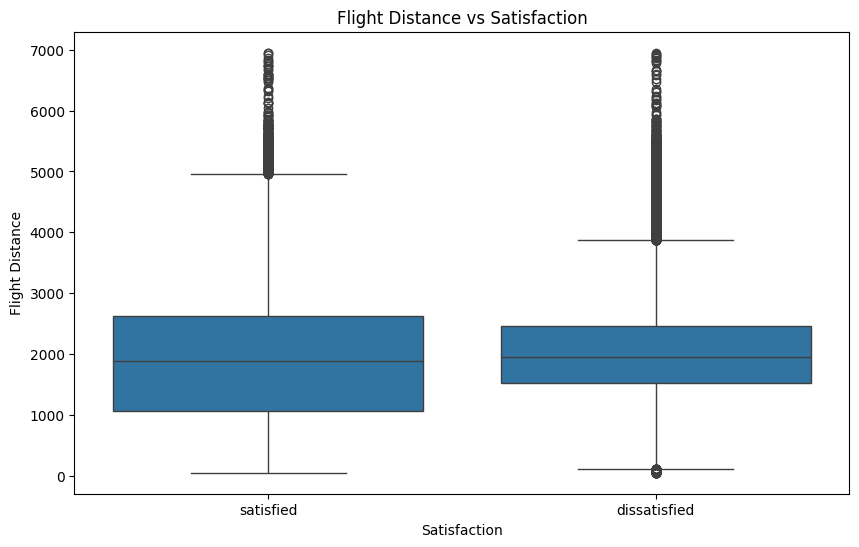

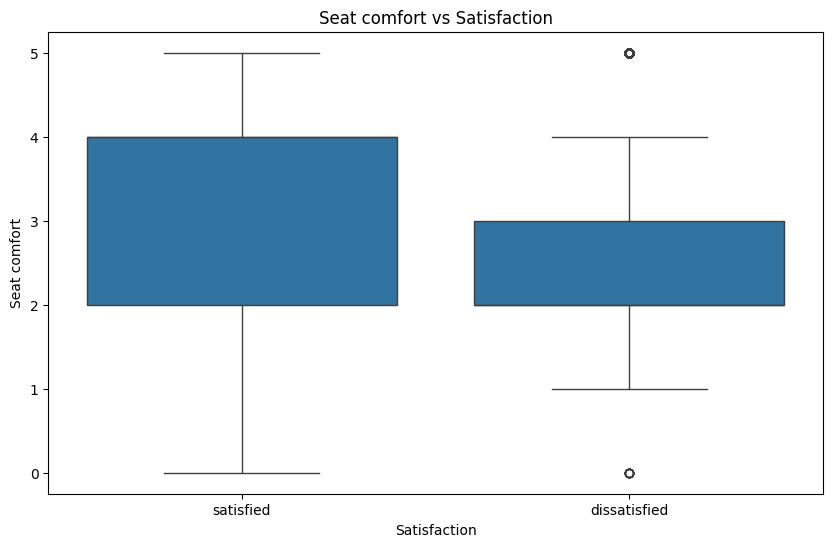

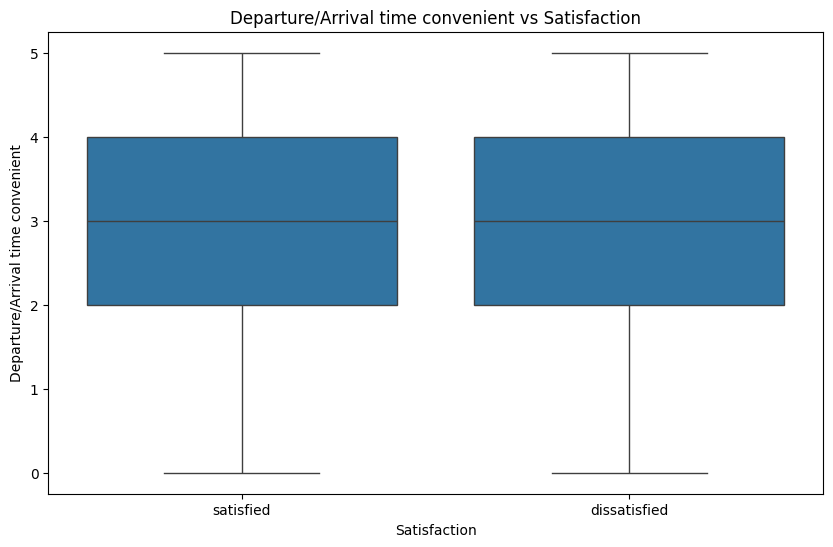

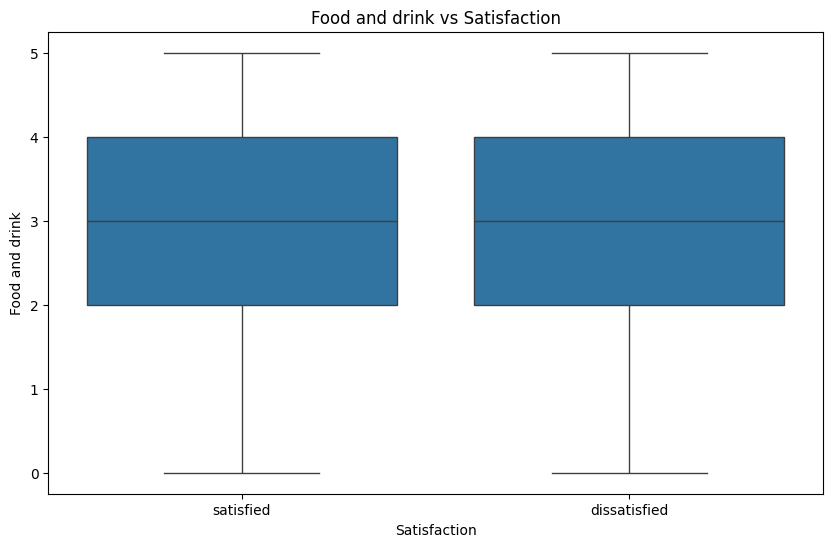

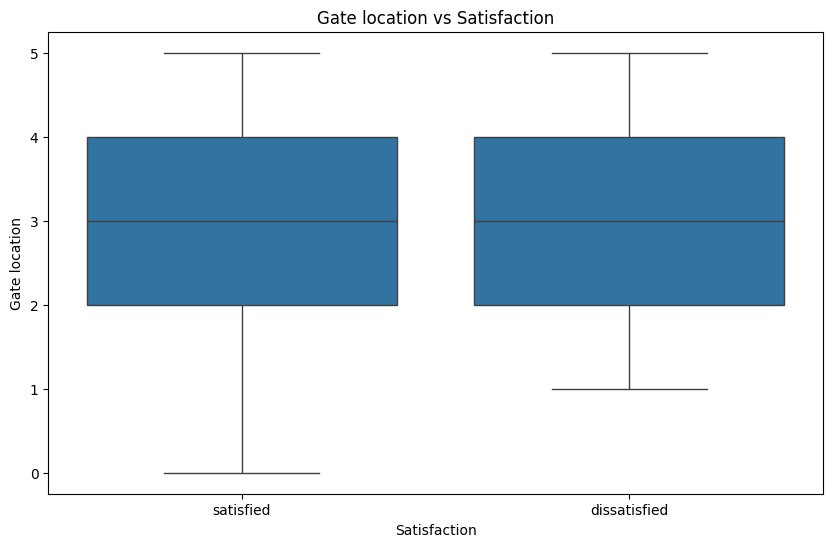

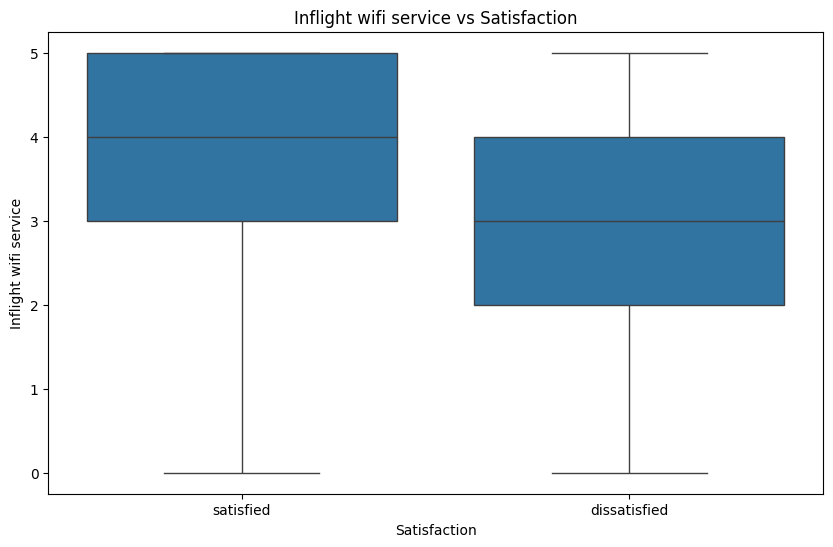

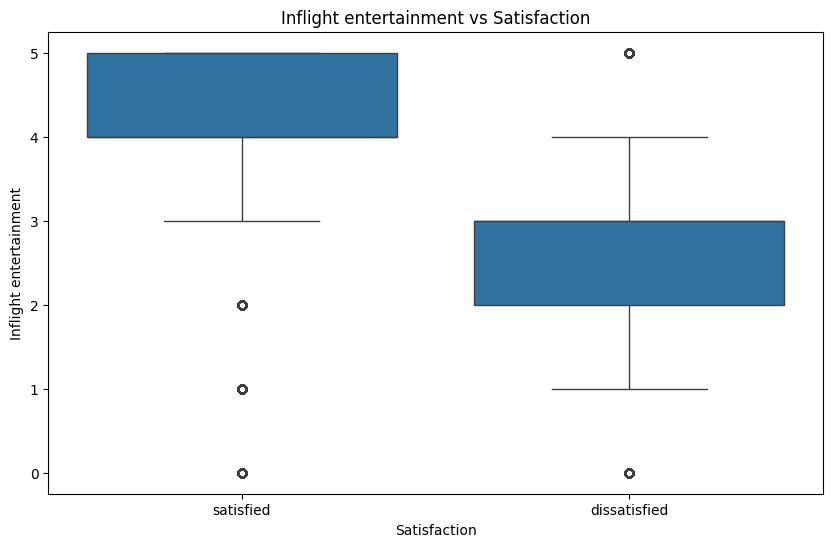

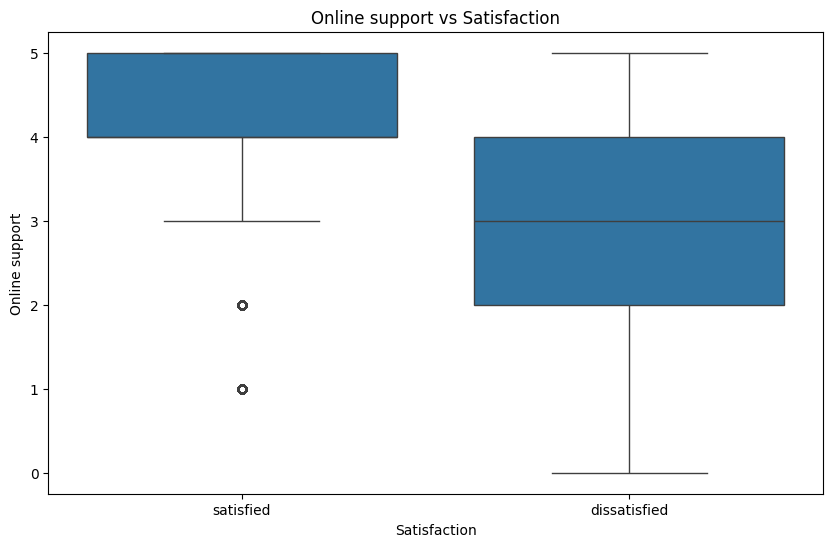

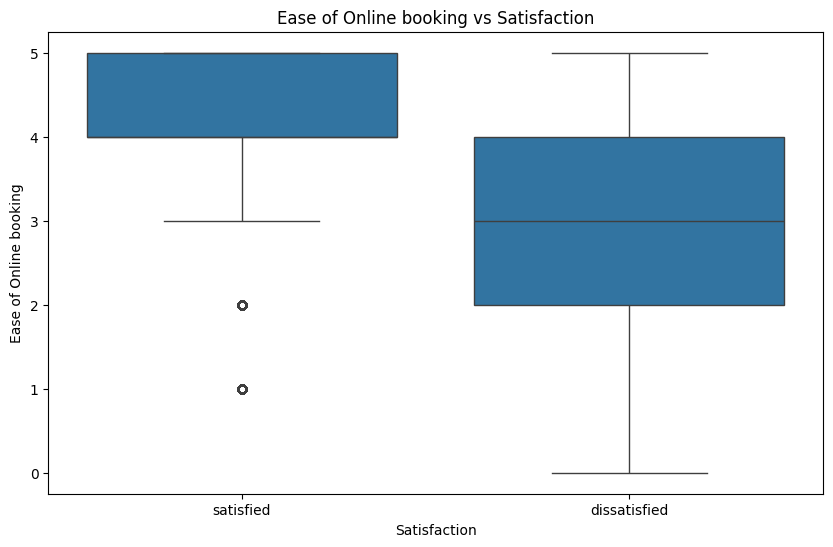

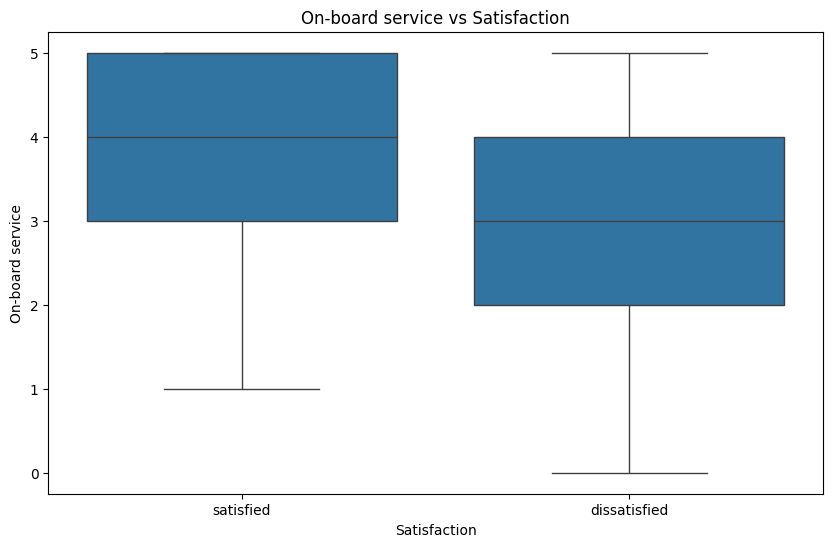

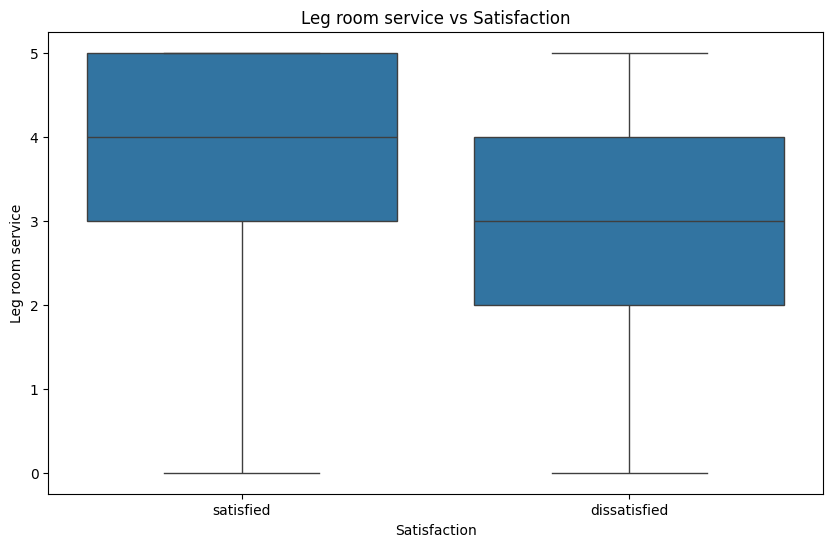

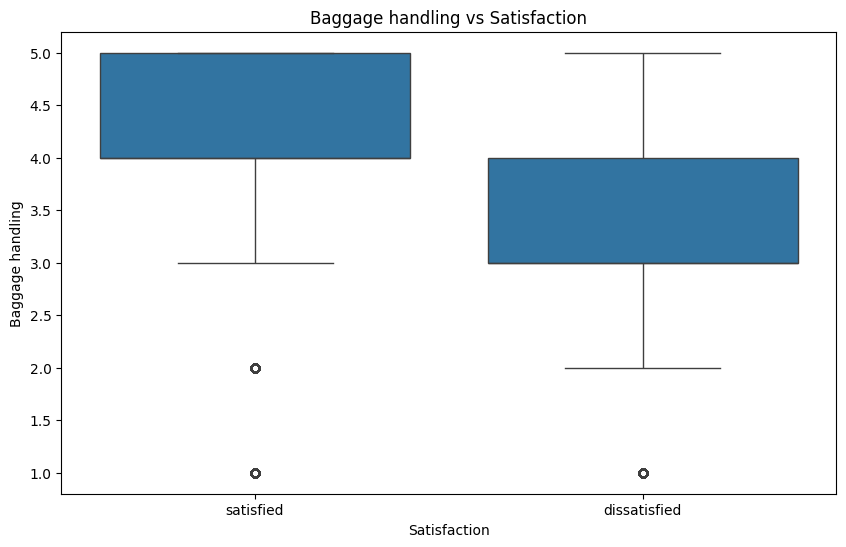

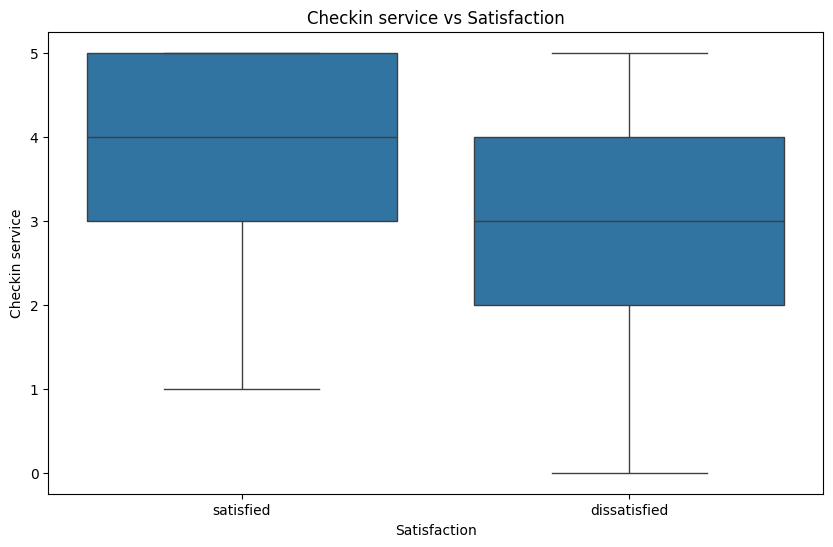

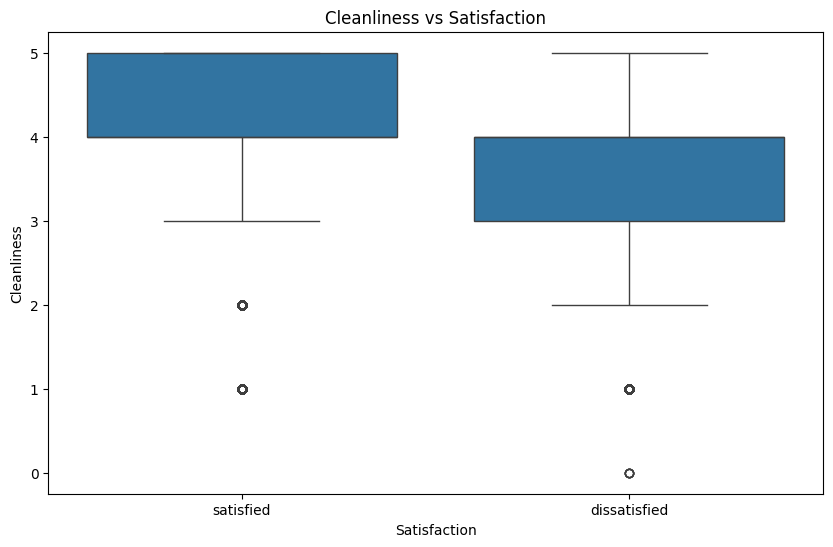

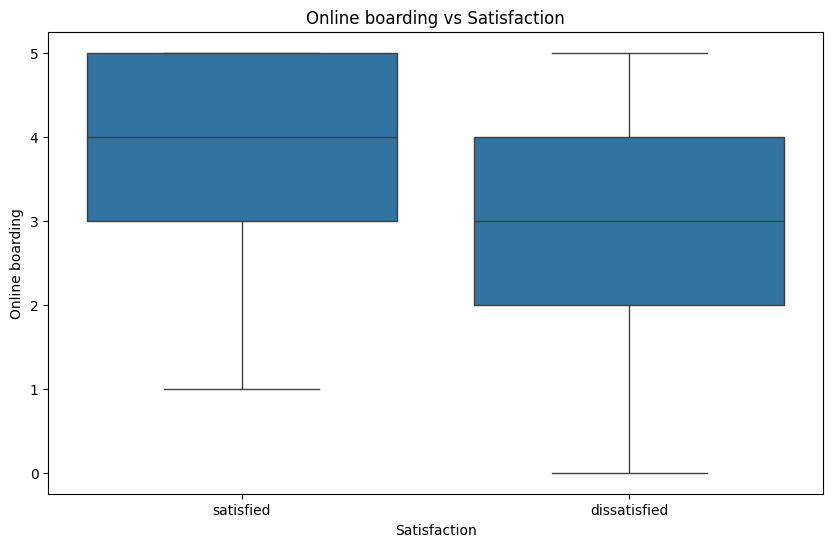

In [32]:
# Function to plot feature vs satisfaction
def plot_feature_vs_satisfaction(cleaned_df, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='satisfaction', y=feature, data=cleaned_df)
    plt.title(f'{feature} vs Satisfaction')
    plt.xlabel('Satisfaction')
    plt.ylabel(feature)
    plt.show()

# Plot feature vs satisfaction for selected features
selected_features = ['Age', 'Flight Distance'] + service_ratings
for feature in selected_features:
    plot_feature_vs_satisfaction(cleaned_df, feature)



### Age and Flight Distance:
There doesn't seem to be a strong difference in age or flight distance between satisfied and unsatisfied customers. This suggests that these features may not be significant predictors of customer satisfaction on their own.

### Service Ratings:
Generally, higher ratings in features such as **Seat comfort**, **Inflight entertainment**, **On-board service**, and other service-related aspects are associated with higher customer satisfaction. Conversely, lower ratings in these features are often linked to unsatisfied customers. This highlights the importance of service quality in influencing customer satisfaction.


# Step 4: Preprocess the Data

**Tasks:**
- Handle missing values and correct errors.
- Normalize or scale features if necessary.
- Encode categorical variables.

In [62]:
cleaned_df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [59]:
cleaned_df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [66]:
#encoding categorical features 
categorical_features = ['Customer Type', 'Type of Travel', 'Class']

data_encode = pd.get_dummies(cleaned_df, columns=categorical_features, drop_first=True)

data_encode['satisfaction'] = data_encode['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [71]:
data_encode['satisfaction'].fillna(0, inplace =True)

/var/folders/t6/n5_p2l9d713fcc34t476hzhw0000gn/T/ipykernel_74941/1708836488.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encode['satisfaction'].fillna(0, inplace =True)


In [74]:
data_encode['satisfaction'].value_counts()

satisfaction
1.0    71087
0.0    58793
Name: count, dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
scaler = StandardScaler()
data_encode[numerical_features] = scaler.fit_transform(data_encode[numerical_features])


In [80]:
data_encode

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1.0,1.691351,-1.671103,0,0,0,2,2,4,2,...,3,5,3,2,-0.386481,-0.392329,False,True,True,False
1,1.0,0.500820,0.469852,0,0,0,3,0,2,2,...,4,2,3,2,7.756204,7.536854,False,True,False,False
2,1.0,-1.615680,0.152458,0,0,0,3,2,0,2,...,4,4,4,2,-0.386481,-0.392329,False,True,True,False
3,1.0,1.360648,-1.322552,0,0,0,3,3,4,3,...,1,4,1,3,-0.386481,-0.392329,False,True,True,False
4,1.0,2.022054,-1.584452,0,0,0,3,4,3,4,...,2,4,2,5,-0.386481,-0.392329,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,-0.689712,-0.243799,5,5,5,3,2,5,2,...,4,4,4,2,-0.386481,-0.392329,True,True,True,False
129876,0.0,1.559070,0.102804,2,3,2,4,2,1,1,...,3,1,2,1,4.183929,4.079210,True,True,False,False
129877,0.0,1.955913,0.329653,3,0,3,3,3,2,2,...,4,2,3,2,3.684862,3.845234,True,True,True,False
129878,0.0,1.757491,0.456222,3,2,3,2,3,2,2,...,3,2,1,2,4.682997,4.937122,True,True,True,False


# Step 5: Analyze the Data

**Exploratory Data Analysis (EDA):**
- Identify trends, patterns, and correlations in the data.
- Visualize the data using charts and plots.

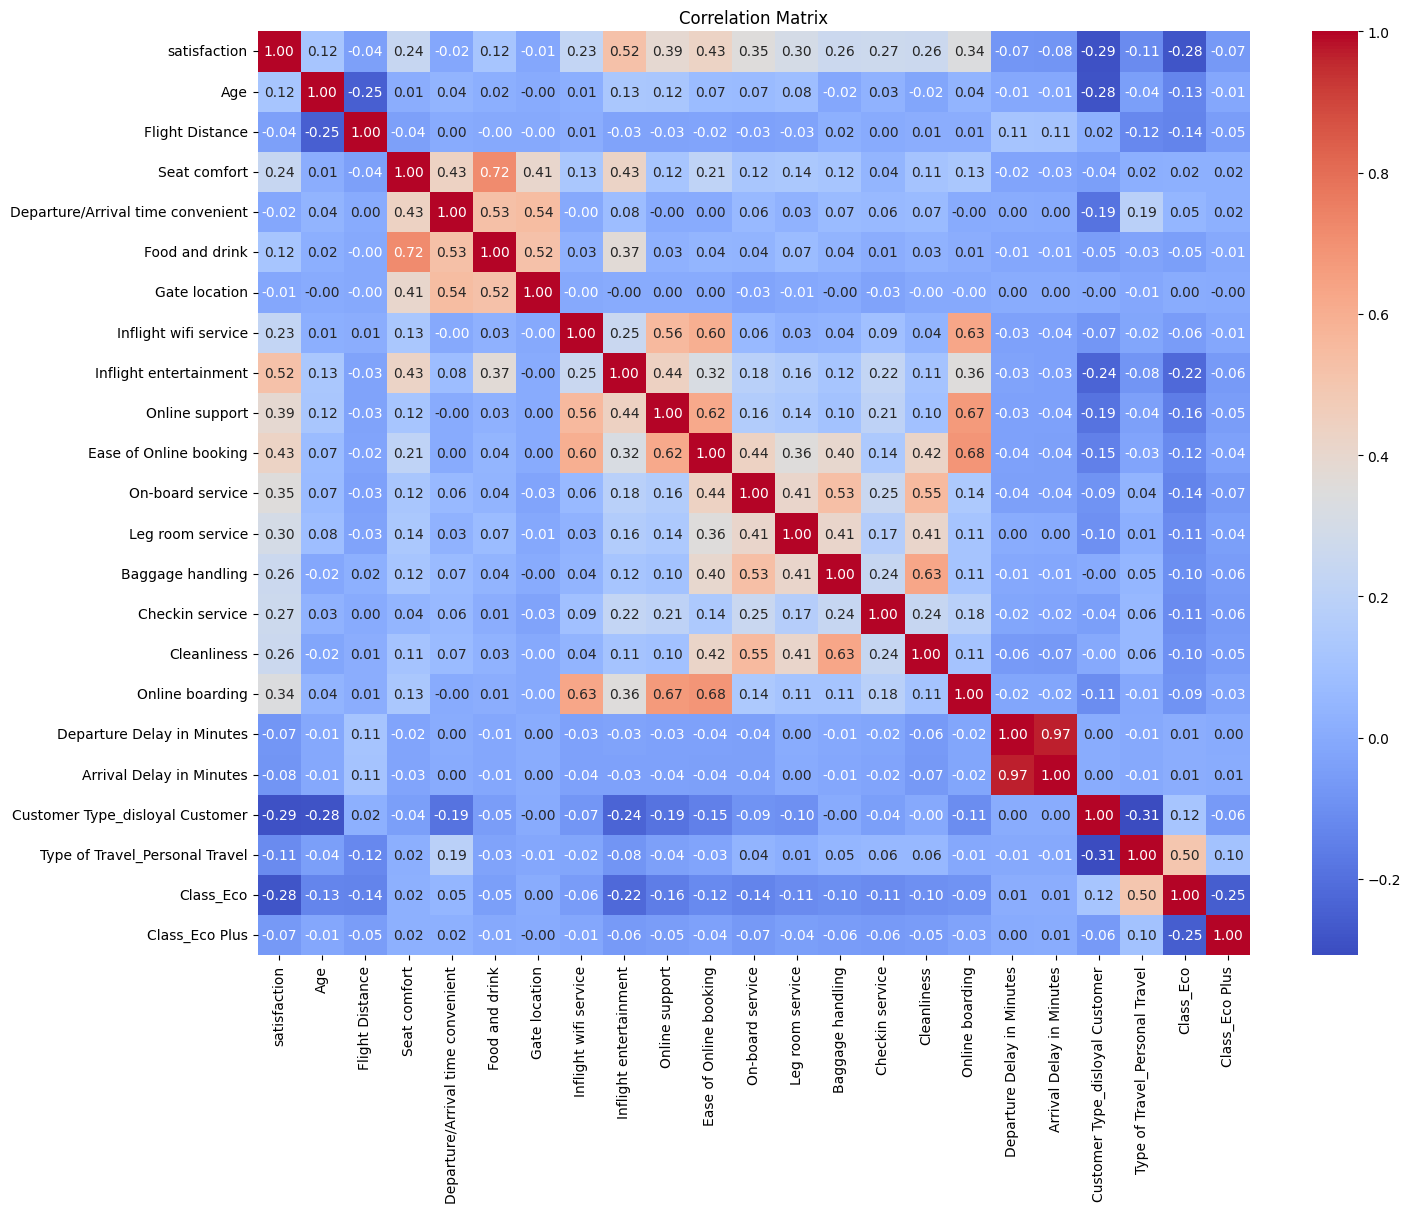

In [81]:
# Calculate correlation matrix
correlation_matrix = data_encode.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


## Correlation Matrix Analysis

The correlation matrix provides insights into the relationships between features and customer satisfaction. Here are some key observations:

### Positive Correlations:
- **Inflight entertainment:** This feature shows a relatively strong positive correlation with customer satisfaction, indicating that better inflight entertainment services are associated with higher customer satisfaction.
- **On-board service:** High-quality on-board service is positively correlated with customer satisfaction.
- **Seat comfort:** Comfortable seating is strongly linked to higher satisfaction levels among customers.
- **Cleanliness:** Cleanliness of the aircraft contributes positively to customer satisfaction.

### Negative Correlations:
- **Departure Delay in Minutes:** This feature shows a negative correlation with customer satisfaction. Longer departure delays are associated with lower satisfaction levels.
- **Arrival Delay in Minutes:** Similar to departure delays, longer arrival delays negatively impact customer satisfaction, indicating that punctuality is crucial for customer satisfaction.


# Step 6: Feature Engineering

**Tasks:**
- Create new features that may improve model performance.
- Select the most relevant features for the model.

In [91]:
#pulling from our correlation matrix
features = [
    'Inflight entertainment', 'On-board service', 'Seat comfort', 'Cleanliness',
    'Departure Delay in Minutes']


X = data_encode[features]
y = data_encode['satisfaction']

In [113]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
129875    1.0
129876    0.0
129877    0.0
129878    0.0
129879    0.0
Name: satisfaction, Length: 129880, dtype: float64

# Step 7: Model Building

**Tasks:**
- Choose appropriate machine learning algorithms for classification.
- Split the data into training and testing sets.
- Train multiple models and evaluate their performance.

In [95]:
from sklearn.model_selection import train_test_split

# spltting into test and train sets 
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [98]:
# Predictions
log_reg_pred = log_reg.predict(X_test)
rf_pred = rf_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)

# Step 8: Model Evaluation

**Tasks:**
- Evaluate models using metrics like accuracy, precision, recall, and F1-score.
- Perform cross-validation to ensure robustness.

In [100]:
# Evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Model evaluation metrics
log_reg_metrics = evaluate_model(y_test, log_reg_pred)
rf_metrics = evaluate_model(y_test, rf_pred)
gb_metrics = evaluate_model(y_test, gb_pred)

# Print the metrics using f-strings for better readability
print(f"Logistic Regression Metrics:\n"
      f"Accuracy: {log_reg_metrics[0]:.4f}\n"
      f"Precision: {log_reg_metrics[1]:.4f}\n"
      f"Recall: {log_reg_metrics[2]:.4f}\n"
      f"F1-Score: {log_reg_metrics[3]:.4f}\n")

print(f"Random Forest Metrics:\n"
      f"Accuracy: {rf_metrics[0]:.4f}\n"
      f"Precision: {rf_metrics[1]:.4f}\n"
      f"Recall: {rf_metrics[2]:.4f}\n"
      f"F1-Score: {rf_metrics[3]:.4f}\n")

print(f"Gradient Boosting Metrics:\n"
      f"Accuracy: {gb_metrics[0]:.4f}\n"
      f"Precision: {gb_metrics[1]:.4f}\n"
      f"Recall: {gb_metrics[2]:.4f}\n"
      f"F1-Score: {gb_metrics[3]:.4f}\n")


Logistic Regression Metrics:
Accuracy: 0.7873
Precision: 0.7987
Recall: 0.8206
F1-Score: 0.8095

Random Forest Metrics:
Accuracy: 0.8797
Precision: 0.8840
Recall: 0.8996
F1-Score: 0.8917

Gradient Boosting Metrics:
Accuracy: 0.8756
Precision: 0.8970
Recall: 0.8744
F1-Score: 0.8856



## Model Performance Evaluation

### Logistic Regression Metrics:
- **Accuracy: 0.7873**: This indicates that the model correctly predicts 78.73% of the cases.
- **Precision: 0.7987**: Of all the instances the model predicted as positive, 79.87% were actually positive.
- **Recall: 0.8206**: Of all the actual positive instances, the model correctly identified 82.06% of them.
- **F1-Score: 0.8095**: This is the harmonic mean of precision and recall, balancing the two metrics.

### Random Forest Metrics:
- **Accuracy: 0.8797**: The Random Forest model correctly predicts 87.97% of the cases, showing a significant improvement over Logistic Regression.
- **Precision: 0.8840**: The model's precision is 88.40%, indicating it is good at predicting positive cases.
- **Recall: 0.8996**: The recall is 89.96%, meaning it identifies a high proportion of actual positive instances.
- **F1-Score: 0.8917**: The high F1-Score indicates a good balance between precision and recall.

### Gradient Boosting Metrics:
- **Accuracy: 0.8756**: This model correctly predicts 87.56% of the cases, slightly lower than Random Forest but still high.
- **Precision: 0.8970**: The highest precision among the three models at 89.70%, indicating it makes fewer false positive predictions.
- **Recall: 0.8744**: The recall is 87.44%, slightly lower than Random Forest.
- **F1-Score: 0.8856**: The high F1-Score shows a good balance between precision and recall, close to Random Forest.

### Model Performance Evaluation:

1. **Random Forest**:
   - **Strengths**: Highest accuracy (87.97%) and recall (89.96%), which means it correctly identifies the most actual positive cases.
   - **Overall**: This model provides the best overall performance with a high F1-Score (0.8917), indicating a good balance between precision and recall.

2. **Gradient Boosting**:
   - **Strengths**: Highest precision (89.70%), meaning it has the fewest false positive predictions.
   - **Overall**: Close to Random Forest in terms of performance with slightly lower recall but highest precision. Its F1-Score (0.8856) is also very high, indicating a balanced performance.

3. **Logistic Regression**:
   - **Strengths**: Simplicity and interpretability, although with lower performance metrics.
   - **Overall**: This model has the lowest performance metrics among the three. It could serve as a good baseline model, but the other two models outperform it significantly.

### Conclusion:
- **Random Forest** and **Gradient Boosting** both perform very well, with Random Forest having a slight edge in recall and overall balance, while Gradient Boosting excels in precision.
- **Logistic Regression** is the least performant of the three models, but it provides a simple and interpretable baseline.

Based on these results, the **Random Forest** model is the best choice for predicting customer satisfaction due to its high accuracy, recall, and balanced F1-Score. The **Gradient Boosting** model is a close second, offering the highest precision.


# Step 9: Tune the Model

**Tasks:**
- Optimize model hyperparameters using techniques like GridSearchCV or RandomizedSearchCV.

## Hypertuning for random forest

In [101]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=2, scoring='f1')


In [102]:
# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [104]:
# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf

({'bootstrap': True,
  'max_depth': 20,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 300},
 0.8920958942561207)

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  34.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  21.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  31.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  25.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  48.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min

### Hyperparameter Tuning Results

The hyperparameter tuning using `GridSearchCV` for the Random Forest model provided the following best hyperparameters and the best cross-validated score:

#### Best Hyperparameters:
```python
{
  'bootstrap': True,
  'max_depth': 20,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 300
}

#### Best Cross-Validated Score:
```python
0.8920958942561207

## Re-evaluting Random Forest model with the best parameters

In [105]:
# Re-evaluate the model with the best parameters
best_rf_clf = RandomForestClassifier(
    bootstrap=True,
    max_depth=20,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

# Train the model
best_rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_clf.predict(X_test)

# Evaluate the model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

# Display the results
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1-Score: {f1_best_rf:.4f}")


Accuracy: 0.8852
Precision: 0.8889
Recall: 0.9045
F1-Score: 0.8966


### Model Performance Comparison

Before Hyperparameter Tuning:
- **Accuracy**: 0.8797
- **Precision**: 0.8840
- **Recall**: 0.8996
- **F1-Score**: 0.8917

After Hyperparameter Tuning (Best Parameters):
- **Accuracy**: 0.8852
- **Precision**: 0.8889
- **Recall**: 0.9045
- **F1-Score**: 0.8966

### Analysis of Results

The hyperparameter tuning process has led to a noticeable improvement in the model's performance across all evaluation metrics:

1. **Accuracy**: Increased from 0.8797 to 0.8852
    - The tuned model correctly predicts customer satisfaction more often compared to the untuned model.
2. **Precision**: Increased from 0.8840 to 0.8889
    - The tuned model has a higher precision, meaning it is better at predicting satisfied customers without including too many false positives.
3. **Recall**: Increased from 0.8996 to 0.9045
    - The tuned model is also better at capturing true satisfied customers, reducing the number of false negatives.
4. **F1-Score**: Increased from 0.8917 to 0.8966
    - The F1-Score, which balances precision and recall, shows an overall improvement in the model's ability to predict customer satisfaction.

### Conclusion

The hyperparameter tuning has positively impacted the Random Forest model's performance, resulting in more accurate and reliable predictions of customer satisfaction. These improvements highlight the importance of tuning model parameters to achieve the best possible performance. The tuned model can provide better insights and more effective strategies for improving customer satisfaction in the airline industry.


### Hyperparameter Tuning Methodology

In our project, we employed different strategies for hyperparameter tuning of the Random Forest and Gradient Boosting models. Here's an explanation of why we chose `GridSearchCV` for Random Forest and `RandomizedSearchCV` for Gradient Boosting.

#### Random Forest with GridSearchCV

For the Random Forest model, we used `GridSearchCV`. The reasons for this choice are:

- **Exhaustive Search**: `GridSearchCV` performs an exhaustive search over all possible combinations in the parameter grid. This ensures that we explore every combination of hyperparameters, providing the most thorough search for the best parameters.
- **Feasibility**: The parameter grid for Random Forest was relatively small and manageable. This made it feasible to use `GridSearchCV` without significant computational overhead.

Here's the parameter grid we used for Random Forest:
```python
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


### Gradient Boosting with RandomizedSearchCV

For the Gradient Boosting model, we opted for `RandomizedSearchCV`. The reasons for this choice are:

- **Large Parameter Grid**: The parameter grid for Gradient Boosting was larger and more complex. Evaluating all possible combinations using `GridSearchCV` would have been computationally expensive and time-consuming.
- **Efficiency**: `RandomizedSearchCV` randomly samples a subset of the parameter combinations, making it more efficient and faster for large grids. This allows us to explore a wide range of hyperparameters without the need for an exhaustive search.
- **Good Performance**: Despite not checking every combination, `RandomizedSearchCV` can still find very good hyperparameter settings in a reasonable amount of time.

### Summary
By choosing `GridSearchCV` for Random Forest, we ensured a thorough and exhaustive search for the best hyperparameters within a manageable grid. For Gradient Boosting, `RandomizedSearchCV` provided a more efficient and faster way to explore a larger and more complex parameter space. This approach allowed us to optimize the hyperparameters effectively for both models, balancing thoroughness and efficiency.


## Hypertuning Gradient Boost Model

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_grid_gb, 
                                      n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='f1')

# Fit RandomizedSearchCV
random_search_gb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_gb = random_search_gb.best_params_
best_score_gb = random_search_gb.best_score_

best_params_gb, best_score_gb



Fitting 3 folds for each of 50 candidates, totalling 150 fits


({'subsample': 1.0,
  'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 4,
  'max_depth': 4,
  'learning_rate': 0.2},
 0.8927907006808473)

[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.9; total time=  28.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=  15.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1.0; total time=  15.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time=  18.6s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=  30.7s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1.0; total time=  14.8s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.9; total time=  15.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf

### Hyperparameter Tuning Results for Gradient Boosting

The hyperparameter tuning using `RandomizedSearchCV` for the Gradient Boosting model provided the following best hyperparameters and the best cross-validated score:

#### Best Hyperparameters:
```python
{
  'subsample': 1.0,
  'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 4,
  'max_depth': 4,
  'learning_rate': 0.2
}


Best Cross-Validated Score:

0.8927907006808473


## Re-evaluting Random Forest model with the best parameters

In [108]:
# Re-evaluate the Gradient Boosting Model with Best Parameters
best_gb_clf = GradientBoostingClassifier(
    subsample=1.0,
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=4,
    max_depth=4,
    learning_rate=0.2,
    random_state=42
)

# Fit the model on the training data
best_gb_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_best_gb = best_gb_clf.predict(X_test)

# Calculate performance metrics
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
precision_best_gb = precision_score(y_test, y_pred_best_gb)
recall_best_gb = recall_score(y_test, y_pred_best_gb)
f1_best_gb = f1_score(y_test, y_pred_best_gb)

# Display the results
print(f"Accuracy: {accuracy_best_gb:.4f}")
print(f"Precision: {precision_best_gb:.4f}")
print(f"Recall: {recall_best_gb:.4f}")
print(f"F1-Score: {f1_best_gb:.4f}")


Accuracy: 0.8844
Precision: 0.8831
Recall: 0.9104
F1-Score: 0.8966


### Comparison of Gradient Boosting Model Performance Before and After Hyperparameter Tuning

We evaluated the Gradient Boosting model's performance both before and after hyperparameter tuning. Below are the results for both scenarios:

#### Performance Metrics Before Hyperparameter Tuning:
- **Accuracy**: 0.8756
- **Precision**: 0.8970
- **Recall**: 0.8744
- **F1-Score**: 0.8856

#### Performance Metrics After Hyperparameter Tuning:
- **Accuracy**: 0.8844
- **Precision**: 0.8831
- **Recall**: 0.9104
- **F1-Score**: 0.8966

### Comparison and Conclusions:
- **Accuracy**: The accuracy of the model improved slightly from 0.8756 to 0.8844 after hyperparameter tuning.
- **Precision**: The precision decreased from 0.8970 to 0.8831. This indicates that while the model became more accurate overall, it is slightly less precise in identifying true positives.
- **Recall**: The recall increased significantly from 0.8744 to 0.9104. This suggests that the tuned model is better at capturing true positives, making it more sensitive.
- **F1-Score**: The F1-score, which is the harmonic mean of precision and recall, improved from 0.8856 to 0.8966. This shows an overall improvement in the balance between precision and recall.

### Summary:
The hyperparameter tuning process improved the Gradient Boosting model's performance in several key areas:
1. **Increased Accuracy**: The overall accuracy of the model increased.
2. **Improved Recall**: The model's ability to correctly identify true positives improved significantly.
3. **Higher F1-Score**: The overall balance between precision and recall improved, as evidenced by the higher F1-score.

While there was a slight decrease in precision, the substantial improvement in recall and F1-score indicates that the hyperparameter tuning was successful in enhancing the model's performance. The tuned model is more effective in predicting customer satisfaction with a better balance of performance metrics.


### Final Model Comparison and Conclusion

After hyperparameter tuning, we compared the performance of the Random Forest and Gradient Boosting models. Below are the performance metrics for both models after tuning:

#### Hyper-Tuned Random Forest Model Performance:
- **Accuracy**: 0.8852
- **Precision**: 0.8889
- **Recall**: 0.9045
- **F1-Score**: 0.8966

#### Hyper-Tuned Gradient Boosting Model Performance:
- **Accuracy**: 0.8844
- **Precision**: 0.8831
- **Recall**: 0.9104
- **F1-Score**: 0.8966

### Comparison of Models:
- **Accuracy**: The Random Forest model has a slight edge in accuracy (0.8852) compared to the Gradient Boosting model (0.8844).
- **Precision**: The Random Forest model has higher precision (0.8889) than the Gradient Boosting model (0.8831), indicating fewer false positives.
- **Recall**: The Gradient Boosting model has higher recall (0.9104) compared to the Random Forest model (0.9045), indicating better sensitivity.
- **F1-Score**: Both models have the same F1-score (0.8966), indicating a balanced performance between precision and recall.

### Best Model:
Considering the performance metrics, both models perform similarly well with slight differences. The choice between the two models can depend on the specific priorities:
- **If precision (minimizing false positives) is more critical**, the **Random Forest** model might be preferred.
- **If recall (capturing more true positives) is more important**, the **Gradient Boosting** model might be preferred.

Given the balanced F1-scores, both models are strong candidates, but for a slight edge in precision and overall balance, **the hyper-tuned Random Forest model** might be considered the best model going forward.

### Project Summary:
This project aimed to predict customer satisfaction in airlines using various features from the dataset. Here’s a summary of our approach and findings:

1. **Data Exploration and Preprocessing**: We explored the dataset, handled missing values, normalized features, and encoded categorical variables.
2. **Feature Selection**: Key features influencing customer satisfaction were identified, such as inflight entertainment, on-board service, seat comfort, cleanliness, departure delay, and arrival delays.
3. **Model Building and Evaluation**: We built and evaluated multiple models (Logistic Regression, Random Forest, and Gradient Boosting) using performance metrics like accuracy, precision, recall, and F1-score.
4. **Hyperparameter Tuning**: We used GridSearchCV for Random Forest and RandomizedSearchCV for Gradient Boosting to optimize the models’ performance.
5. **Model Comparison**: After tuning, both models showed strong performance, with the Random Forest model slightly outperforming in precision.

### Conclusion:
Through this project, we successfully developed models to predict customer satisfaction, providing valuable insights into areas impacting satisfaction. The hyper-tuned Random Forest model emerged as the preferred choice due to its balanced performance. These models can help airline companies identify areas for improvement, enhance service quality, and personalize customer experiences.

Future steps could include deploying the chosen model, continuously monitoring its performance, and updating it as new data becomes available to maintain its predictive power.


# Step 10: Deploy the Model

**Tasks:**
- Save the trained model.
- Create an API or web application for the model.

In [111]:
# lets start by saving the trained model 
import joblib


#saving the trained random forest model
joblib.dump(best_rf_clf, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Step 11: Document the Project

**Tasks:**
- Document the code, methodology, and findings.
- Create a README.md file.




# Customer Satisfaction Prediction

## Project Overview

This project aims to predict customer satisfaction based on various features of their flight experience. The models used include Random Forest and Gradient Boosting classifiers. Hyperparameter tuning was performed to optimize the model performance.

## Data

The data used for this project includes features such as inflight entertainment, on-board service, seat comfort, cleanliness, and departure delay. The target variable is customer satisfaction.

## Methodology

1. **Data Preprocessing**: 
   - Data cleaning and encoding.
   - Handling missing values.
   - Normalization of numerical features.

2. **Feature Selection**:
   - Selection of the most relevant features based on correlation analysis.

3. **Model Training**:
   - Split the data into training and testing sets.
   - Train a Random Forest model and a Gradient Boosting model.

4. **Hyperparameter Tuning**:
   - Use GridSearchCV for Random Forest.
   - Use RandomizedSearchCV for Gradient Boosting.

5. **Model Evaluation**:
   - Evaluate models using accuracy, precision, recall, and F1-score.

## Findings

- The hyper-tuned Random Forest model achieved an accuracy of 0.8852, precision of 0.8889, recall of 0.9045, and F1-score of 0.8966.
- The hyper-tuned Gradient Boosting model achieved an accuracy of 0.8844, precision of 0.8831, recall of 0.9104, and F1-score of 0.8966.
- Both models performed similarly, but the Random Forest model was slightly better in terms of precision.

## Streamlit App

A Streamlit app was created to allow users to input features and predict customer satisfaction.



# Step 12: Maintain and Monitor

**Tasks:**
- Monitor model performance post-deployment.
- Update the model as needed based on new data or changing requirements.


1. **Monitor model performance post-deployment**:
   - Set up logging and monitoring to track key metrics such as accuracy, precision, recall, and F1-score.
   - Use tools like Prometheus, Grafana, or custom dashboards to visualize the performance over time.
   - Implement alerting mechanisms to notify if the performance degrades beyond a certain threshold.

2. **Update the model as needed based on new data or changing requirements**:
   - Schedule regular retraining of the model using new data to keep it up-to-date.
   - Incorporate feedback from users to refine the model and its predictions.
   - Continuously evaluate the feature importance and consider adding new features or removing less relevant ones.
   - Use automated machine learning (AutoML) tools to streamline the retraining process and hyperparameter optimization.

By following these steps, you ensure that the deployed model remains accurate and reliable over time, adapting to any changes in the data or user requirements.
